# <h1>Exploratory Data Analysis - Iris Dataset</h1>
## <a href= https://archive.ics.uci.edu/ml/datasets/iris> Public link to dataset <a/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
tips = sns.load_dataset("iris")
irisDataFrame = pd.DataFrame(tips)

<br>Making a scaterplot of sample features in relation to each other distances</br>

In [3]:
print(tips.head(3))
print(irisDataFrame.head(100))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
    sepal_length  sepal_width  petal_length  petal_width     species
0            5.1          3.5           1.4          0.2      setosa
1            4.9          3.0           1.4          0.2      setosa
2            4.7          3.2           1.3          0.2      setosa
3            4.6          3.1           1.5          0.2      setosa
4            5.0          3.6           1.4          0.2      setosa
..           ...          ...           ...          ...         ...
95           5.7          3.0           4.2          1.2  versicolor
96           5.7          2.9           4.2          1.3  versicolor
97           6.2          2.9           4.3          1.3  versicolor
98           5.1          2.5           3.0          1

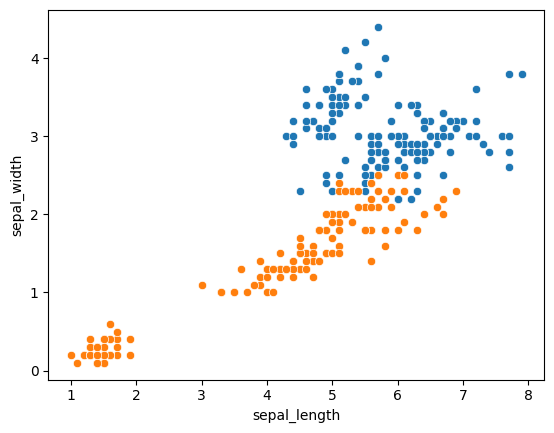

In [4]:
sns.scatterplot(data=tips, x="sepal_length", y="sepal_width")
sns.scatterplot(data=tips, x="petal_length", y="petal_width")

# Show the plot
plt.show()

Tests from main

#### **Set data ready to be used**

##### **Complete Iris --> Only values for implementation**

In [5]:
irisOnlyDataComplete = irisDataFrame[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

##### **Partial Iris --> Virginica, Versicolor**

In [6]:
irisDataVerVir = irisDataFrame[(irisDataFrame.species == 'versicolor') | (irisDataFrame.species == 'virginica')]
irirOnlyVersicolorVirginica = irisDataVerVir[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

irisSampleAssigments_full = irisDataFrame['species']
irisSampleAssigments_partial = irisDataVerVir['species'].reset_index(drop=True)

##### **Result plots**

In [7]:
from fuzzyClass import FuzzyCMeans

In [8]:
# Appling algorithm on full data base
full_data = FuzzyCMeans(irisOnlyDataComplete, max_iter=100)
full_data.generate_pertinence()

The maximum convergence reached was: 13.051627712752065


Application > To see pertinence, simple call self.samples_dict or choose your desired sample.


In [9]:
# Appling algorithm on particional data base

partial_data = FuzzyCMeans(irirOnlyVersicolorVirginica, max_iter=100)
partial_data.generate_pertinence()

The maximum convergence reached was: 8.392021749731462


Application > To see pertinence, simple call self.samples_dict or choose your desired sample.


<h1> Micro hub to compare pertinence with original...<h1>

<h3> FULL DATASET: </h3>

In [10]:
sample_select = 1  # Select the sample to see the pertinence

x1 = full_data.samples_dict[f"x{sample_select}"]
print(f"Pertinences from sample x1: \n {x1} \n")

# Compare with the original data
print(f"Original sample specie: {irisSampleAssigments_full[sample_select - 1]}")

Pertinences from sample x1: 
 {'k1': np.float64(0.9860584933924023), 'k2': np.float64(0.00697075330379892), 'k3': np.float64(0.0069707533037989084)} 

Original sample specie: setosa


<h3> PARTIAL DATASET: </h3>

In [11]:
sample_select = 1  # Select the sample to see the pertinence

x1 = partial_data.samples_dict[f"x{sample_select}"]
print(f"Pertinences from sample x1: \n {x1} \n")

# Compare with the original data
print(f"Original sample specie: {irisSampleAssigments_partial[sample_select - 1]}")

Pertinences from sample x1: 
 {'k1': np.float64(0.28497725380971967), 'k2': np.float64(0.28497725380971994), 'k3': np.float64(0.4300454923805604)} 

Original sample specie: versicolor
